---
title: "Choose model"
execute:
  echo: true
  enabled: false
  output: true
  warning: false
---

In [1]:
#| echo: false
#| output: false
basepath = "/home/root/"

In [2]:
#| echo: false
#| output: false
import os
os.environ["MODIN_ENGINE"] = "dask"
import modin.pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

In [3]:
from detect_common import *

## Evaluate models on concept drift robustness {#sec-robustness}

Now we have generated models with different hyperparameters:

 - normalization (on/off)
 - skip packets for inter-packet duration statistics
 - skip packets for packet sizes statistics
 - apply weight on inter-packet duration statistics
 - apply weight on packet sizes statistics

Merge test set (20% split from the training set) with the benign traffic from the training part (B1 stored in v5_1.csv) generated on Android devices

In [4]:
#| output: false
p1version = "v6"
p2version = "v7"
p3version = "v5"

In [5]:
test_df_p = pd.read_feather(f'cached/mixed.test.p1.{p1version}.saved')

To remove this warning, run the following python code before doing dataframe operations:

    from distributed import Client

    client = Client()

2023-03-25 08:35:36,957 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-mb7aqnwz', purging
2023-03-25 08:35:36,958 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-k_vkczar', purging
2023-03-25 08:35:36,958 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-y_lpuf00', purging
2023-03-25 08:35:36,958 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-_m1ofhok', purging
2023-03-25 08:35:36,959 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-5tx9w8ps', purging
2023-03-25 08:35:36,959 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-4kylf1ln', p

In [24]:
df = pd.read_feather("cached/v5_1.ft")
non_doh = df[df["ipaddr SRC_IP"] == "192.168.2.249"]
some_doh = df[df["ipaddr SRC_IP"] == "192.168.2.149"]

In [7]:
path_doh_ips_androids = basepath + "datasets/data/v5_benign_doh_ips.csv"
path_doh_ips_general = "doh_resolver_ip.csv"
full_list = get_doh_ips(path_doh_ips_androids) + get_doh_ips(path_doh_ips_general)

cp = CacheableProcessing(100, 100, full_list)
non_doh_p = cp.process(non_doh, f"cached/non_doh.p3.{p3version}.saved")
some_doh_p = cp.process(some_doh, f"cached/some_doh.p3.{p3version}.saved")

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.
Reason: `lines` argument not supported
Reason: `lines` argument not supported


In [8]:
len(some_doh_p[some_doh_p["IsDoH"] == True])

2023-03-25 08:36:12,901 - distributed.worker - ERROR - Exception during execution of task lambda-2a4ac64504a801bdd4103c1e2e69e05f.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-a31f7b5e-693e-4414-b723-0aada3933373'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2394, in _prepare_args_for_execution
  

155

2023-03-25 08:36:18,623 - distributed.worker - ERROR - Exception during execution of task lambda-fbc102cefcc6b905afb4b60af0cb657f.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: '_deploy_dask_func-85e31c6b-84ac-4c6e-9868-0effacb20b2c'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2394, in _prepare_args_for_execu

[]

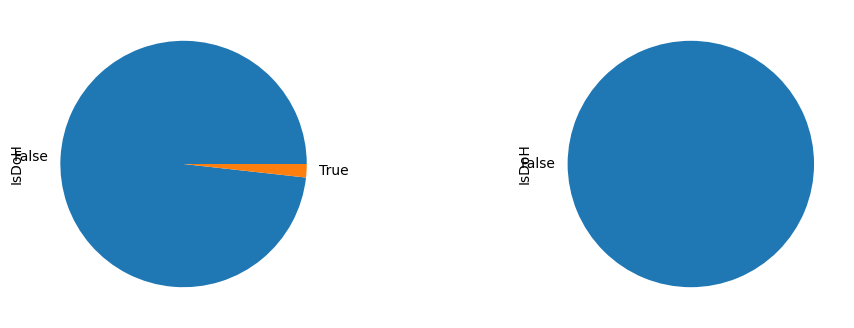

In [9]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(ncols=2, figsize=(12, 4))

some_doh_p["IsDoH"].value_counts().plot(kind="pie", ax=axs[0])
non_doh_p["IsDoH"].value_counts().plot(kind="pie", ax=axs[1])
plt.plot()

In [10]:
android_joined = pd.concat([some_doh_p, non_doh_p])
len(android_joined)

17598

In [11]:
test_df_p["IsDoH"].value_counts()

2023-03-25 08:36:24,614 - distributed.worker - ERROR - Exception during execution of task lambda-68e41b9aed8381a14322f585c199cb91.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: '_deploy_dask_func-793255aa-0d47-4957-bb82-c4b2ce9a0665'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2394, in _prepare_args_for_execu

False    40977
True     29023
Name: IsDoH, dtype: int64

In [12]:
android_joined["IsDoH"].value_counts()

False    17443
True       155
Name: IsDoH, dtype: int64

Balance dataset by oversampling the DoH class

In [13]:
android_doh = android_joined[android_joined["IsDoH"] == True].sample(n=5000, replace=True, random_state=42)
android_non_doh = android_joined[android_joined["IsDoH"] == False].sample(n=5000, replace=True, random_state=42)

test_df_doh = test_df_p[test_df_p["IsDoH"] == True].sample(n=5000, replace=True, random_state=42)
test_df_non_doh = test_df_p[test_df_p["IsDoH"] == False].sample(n=5000, replace=True, random_state=42)

2023-03-25 08:36:34,043 - distributed.worker - ERROR - Exception during execution of task lambda-230edf9be5d944bf3d64782e74be2340.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-2e58be4b-5c18-45c0-9613-a7f064805639'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2394, in _prepare_args_for_execution
  

Mix test dataset and benign data collected from Android

In [14]:
balanced_mix = pd.concat([
    android_doh, android_non_doh, test_df_doh, test_df_non_doh
]).reset_index(drop=True)
balanced_mix = balanced_mix
len(balanced_mix)

20000

[]

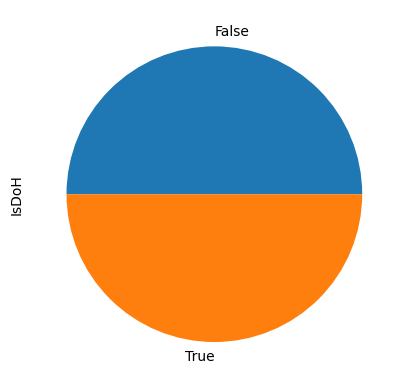

In [15]:
balanced_mix["IsDoH"].value_counts().plot(kind="pie")
plt.plot()

In [16]:
balanced_mix.reset_index(drop=True).to_feather(f'cached/robustness.balanced_mix.p3.{p3version}.ft')

Now we have a dataset which contains from

 - 25% of DoH traffic from the training environment
 - 25% of non-DoH traffic from the training environment
 - 25% of DoH traffic from the production environment
 - 25% of non-DoH traffic from the production environment
 

In [ ]:
from joblib import dump, load
from sklearn import metrics

test = pd.read_feather(f'cached/robustness.balanced_mix.p3.{p3version}.ft')

models = ["LR", "HGB", "RF"]

results = {
    "model": [],
    "normed": [],
    "skips_and_weights": [],
    "test_data_auc": [],
    "fpr": [],
    "tpr": [],
    "thresholds": [],
}

for norm in [True, False]:
    for hyperparam in HYPERPARAMS:
        pp = PreProcessing(norm, *hyperparam)
        name = (
            ('normed-' if norm else 'unnormed-') + 
            '-'.join(str(p) for p in hyperparam)
        )

        print(name)

        full, features, labels = pp.process(test, f"cached/robustness.balanced_mix.p3.{p3version}.{name}.saved")

        for model in models:
            clf = load(f'models/{model}-mix-1-p-{name}.p1.{p1version}.p2.{p2version}.joblib')

            y_pred = clf.predict_proba(features)[:, 1]
            fpr, tpr, threshold = metrics.roc_curve(labels, y_pred)
            auc = round(metrics.roc_auc_score(labels, y_pred), 4)

            results["model"].append(model)
            results["normed"].append(norm)
            results["skips_and_weights"].append(hyperparam)
            results["test_data_auc"].append(auc)
            results["fpr"].append(fpr)
            results["tpr"].append(tpr)
            results["thresholds"].append(threshold)

normed-0-0-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:39:26,418 - distributed.worker - ERROR - Exception during execution of task lambda-fdf52bcabd3ee28c3c3e4c6113dd3c35.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-8ab1e090-8c4e-4164-8484-b0aca3938ee5'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-1-0-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:40:09,988 - distributed.worker - ERROR - Exception during execution of task lambda-b86c71e0d6e0d038f404f7bb99713604.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-ae20e9d0-c8b8-41f7-8dbf-03e5ae0274c5'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-2-0-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:40:59,613 - distributed.worker - ERROR - Exception during execution of task lambda-d89fa0d3e3699a8f9c58f7fd7a7a28f3.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-4a859ace-2811-4622-bc08-8e6e7a54fb74'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-4-0-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:41:49,969 - distributed.worker - ERROR - Exception during execution of task lambda-8e5083bc80092d286da85724fad8bc18.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-593123cb-881b-4151-9bc6-bf7940f1204a'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-6-0-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:42:44,422 - distributed.worker - ERROR - Exception during execution of task lambda-a3b2809bc66b7ab6071969352d21c2f2.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-178bb464-2e6d-4805-8af6-75aed93cc592'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-0-4-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:43:28,078 - distributed.worker - ERROR - Exception during execution of task lambda-7612d60895424f21d74d572ff028244c.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-3f18d520-f655-4682-a895-100926ab46a4'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-1-4-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:44:26,396 - distributed.worker - ERROR - Exception during execution of task lambda-c17bd0a98d4ff80c9e26cd985c776b68.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-b3b7025f-8326-4a30-8503-605eccc4bf02'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-2-4-0-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:45:13,583 - distributed.worker - ERROR - Exception during execution of task lambda-b786b6dffed329d60e4ece1a7cfa9844.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-94522119-d228-4e84-ac61-94e1a221f7b1'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-1-0-1-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:45:59,032 - distributed.worker - WARNING - Could not find data: {'function-025a39555f4547edb6756c727260b943': ['tcp://127.0.0.1:44225', 'tcp://127.0.0.1:39041', 'tcp://127.0.0.1:45001', 'tcp://127.0.0.1:34307', 'tcp://127.0.0.1:36525', 'tcp://127.0.0.1:33087', 'tcp://127.0.0.1:40961', 'tcp://127.0.0.1:39721', 'tcp://127.0.0.1:41173', 'tcp://127.0.0.1:42953', 'tcp://127.0.0.1:32851', 'tcp://127.0.0.1:45139', 'tcp://127.0.0.1:44223', 'tcp://127.0.0.1:38229', 'tcp://127.0.0.1:35943', 'tcp://127.0.0.1:39503', 'tcp://127.0.0.1:44609', 'tcp://127.0.0.1:40465', 'tcp://127.0.0.1:39215', 'tcp://127.0.0.1:34559', 'tcp://127.0.0.1:45721', 'tcp://127.0.0.1:40187', 'tcp://127.0.0.1:37049', 'tcp://127.0.0.1:45575', 'tcp://127.0.0.1:44809', 'tcp://127.0.0.1:33187', 'tcp://127.0.0.1:44117']} on workers: [] (who_has: {'function-025a39555f4547edb6756c727260b943': ['tcp://127.0.0.1:44225', 'tcp://127.0.0.1:39041',

normed-2-0-2-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:46:57,523 - distributed.worker - ERROR - Exception during execution of task lambda-f1f4cd86fd63cb2cb6ba6edcfe2306b0.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-83cd7ce4-716d-4aef-8c08-472bc3d2f334'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-4-0-4-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:47:40,837 - distributed.worker - ERROR - Exception during execution of task lambda-bd28679768cda6fe1e0b6ee652ba4d0d.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-6632d82a-9c8d-4609-b155-a0cae26561b8'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

normed-6-0-6-0


Reason: `lines` argument not supported
Reason: `lines` argument not supported
Reason: `lines` argument not supported
2023-03-25 08:48:29,825 - distributed.worker - ERROR - Exception during execution of task lambda-051326ccdbf11fe1fb0c84f8bbbf8d86.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2390, in _prepare_args_for_execution
    data[k] = self.data[k]
  File "/opt/conda/lib/python3.10/site-packages/distributed/spill.py", line 245, in __getitem__
    return super().__getitem__(key)
  File "/opt/conda/lib/python3.10/site-packages/zict/buffer.py", line 108, in __getitem__
    raise KeyError(key)
KeyError: 'apply_func-9949944e-4c46-4896-a540-ba4152c4d56f'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/distributed/worker.py", line 2271, in execute
    args2, kwargs2 = self._prepare_args_for_execution(ts, args, kwargs)

In [25]:
results_df = pd.DataFrame(results)
results_df.sort_values("test_data_auc", ascending=False)

,model,normed,skips_and_weights,test_data_auc,fpr,tpr,thresholds
53,RF,False,"[2, 0, 0, 0]",0.9780,"[0.0, 0.0, 0.0, 0.0001079447322970639, 0.00010...","[0.0, 0.3485738255033557, 0.3976510067114094, ...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
68,RF,False,"[2, 4, 0, 0]",0.9761,"[0.0, 0.0, 0.0, 0.0001079447322970639, 0.00021...","[0.0, 0.34133808724832215, 0.3921979865771812,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
86,RF,False,"[1, 4, 1, 4]",0.9753,"[0.0, 0.0, 0.0, 0.0002158894645941278, 0.00021...","[0.0, 0.3493078859060403, 0.39890939597315433,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
74,RF,False,"[2, 0, 2, 0]",0.9750,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001079447322...","[0.0, 0.3475251677852349, 0.40058724832214765,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
65,RF,False,"[1, 4, 0, 0]",0.9748,"[0.0, 0.0, 0.0002158894645941278, 0.0004317789...","[0.0, 0.35245385906040266, 0.4047818791946309,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
...,...,...,...,...,...,...,...
9,LR,True,"[4, 0, 0, 0]",0.7774,"[0.0, 0.0, 0.0, 0.0, 0.0002158894645941278, 0....","[0.0, 0.00020973154362416107, 0.00062919463087...","[1.9999999999999998, 0.9999999999999998, 0.999..."
30,LR,True,"[4, 0, 4, 0]",0.7632,"[0.0, 0.0003238341968911917, 0.000431778929188...","[0.0, 0.00041946308724832214, 0.00041946308724...","[2.0, 1.0, 0.9999999999928075, 0.9999999995543..."
57,LR,False,"[6, 0, 0, 0]",0.7533,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000107944732297063...","[0.0, 0.00010486577181208053, 0.00041946308724...","[2.0, 1.0, 0.9993612180547663, 0.9989779662126..."
78,LR,False,"[6, 0, 6, 0]",0.7397,"[0.0, 0.0, 0.0, 0.0, 0.0002158894645941278, 0....","[0.0, 0.00010486577181208053, 0.00031459731543...","[1.999999999996223, 0.999999999996223, 0.99969..."


In [26]:
results_df.to_feather(f'cached/robustness.balanced_mix-results.p3.{p3version}.ft')

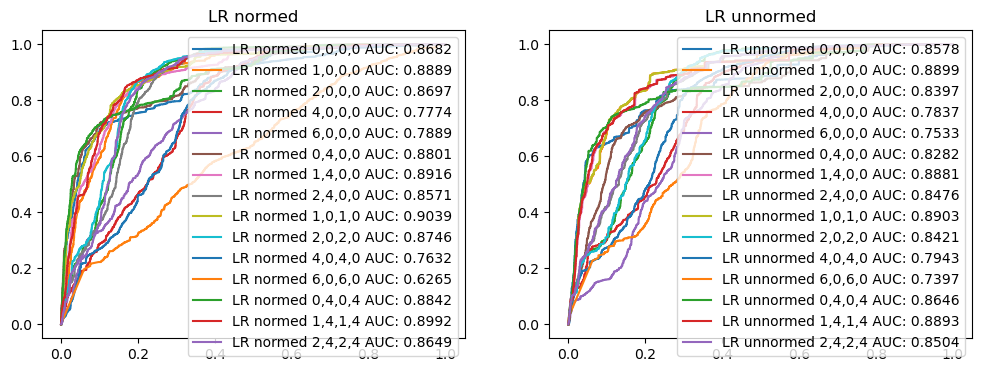

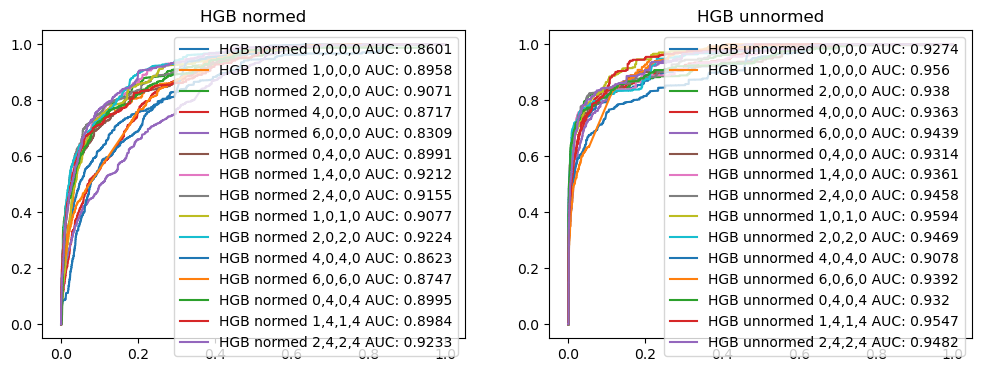

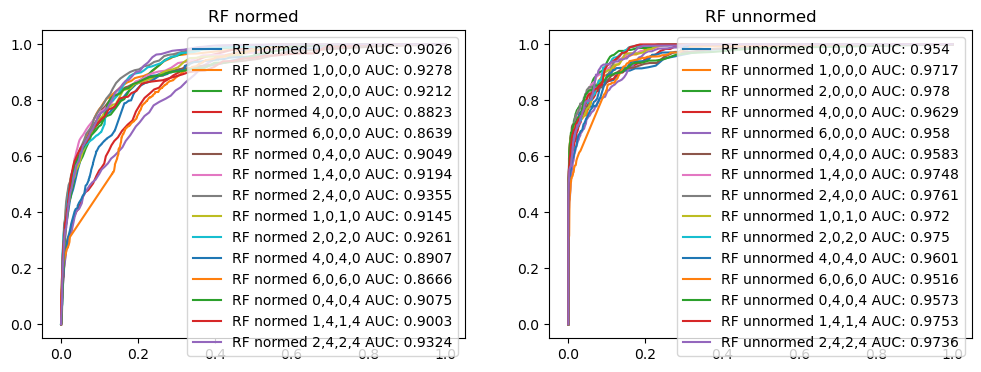

In [7]:
#| label: fig-models-roc
#| fig-cap: ROC and their AUC for test dataset
#| fig-subcap: 
#|   - "Logistic Regression"
#|   - "Hist Gradient Boosting"
#|   - "Random Forest"

from sklearn import metrics
import matplotlib.pyplot as plt

results_df = pd.read_feather(f"cached/robustness.balanced_mix-results.p3.{p3version}.ft")

for model in models:
    fig, axs = plt.subplots(ncols=2, figsize=(12, 4))
    for i, norm in enumerate([True, False]):
        for index, row in results_df[
            (results_df["model"] == model) & (results_df["normed"] == norm)
        ].iterrows():
            axs[i].plot(
                row["fpr"],
                row["tpr"],
                label=f"{row['model']} {'normed' if row['normed'] else 'unnormed'} {','.join([str(i) for i in row['skips_and_weights']])} AUC: {row['test_data_auc']}",
            )

        axs[i].legend()
        axs[i].set_title(f"{model} {'normed' if norm else 'unnormed'}")
    plt.show()

In [18]:
best_normed_model = results_df[results_df["normed"] == True].sort_values("test_data_auc", ascending=False).iloc[:3]
best_unnormed_model = results_df[results_df["normed"] == False].sort_values("test_data_auc", ascending=False).iloc[:3]
baseline_models = results_df[results_df["skips_and_weights"].astype(str) == '[0 0 0 0]'].sort_values("test_data_auc", ascending=False)


## Results

Top 3 normalized and top 3 non-normalized models ranged by the AUC:

In [29]:
#| label: top3-normed
best_normed_model

,model,normed,skips_and_weights,test_data_auc,fpr,tpr,thresholds
23,RF,True,"[2, 4, 0, 0]",0.9355,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00010794...","[0.0, 0.00010486577181208053, 0.00031459731543...","[1.98, 0.98, 0.97, 0.96, 0.95, 0.94, 0.92, 0.9..."
44,RF,True,"[2, 4, 2, 4]",0.9324,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000107944732297063...","[0.0, 0.00041946308724832214, 0.00094379194630...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
5,RF,True,"[1, 0, 0, 0]",0.9278,"[0.0, 0.0, 0.0, 0.0, 0.0001079447322970639, 0....","[0.0, 0.00010486577181208053, 0.00020973154362...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.95, 0.93, 0.92,..."


In [30]:
#| label: top3-unnormed
best_unnormed_model

,model,normed,skips_and_weights,test_data_auc,fpr,tpr,thresholds
53,RF,False,"[2, 0, 0, 0]",0.9780,"[0.0, 0.0, 0.0, 0.0001079447322970639, 0.00010...","[0.0, 0.3485738255033557, 0.3976510067114094, ...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
68,RF,False,"[2, 4, 0, 0]",0.9761,"[0.0, 0.0, 0.0, 0.0001079447322970639, 0.00021...","[0.0, 0.34133808724832215, 0.3921979865771812,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
86,RF,False,"[1, 4, 1, 4]",0.9753,"[0.0, 0.0, 0.0, 0.0002158894645941278, 0.00021...","[0.0, 0.3493078859060403, 0.39890939597315433,...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."


In [19]:
#| label: baseline-models
baseline_models

,model,normed,skips_and_weights,test_data_auc,fpr,tpr,thresholds
47,RF,False,"[0, 0, 0, 0]",0.9540,"[0.0, 0.0001079447322970639, 0.000107944732297...","[0.0, 0.359375, 0.40666946308724833, 0.4403313...","[2.0, 1.0, 0.99, 0.98, 0.97, 0.96, 0.95, 0.94,..."
46,HGB,False,"[0, 0, 0, 0]",0.9274,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00010486577181208053, 0.00020973154362...","[1.9995202910776109, 0.9995202910776108, 0.999..."
2,RF,True,"[0, 0, 0, 0]",0.9026,"[0.0, 0.0001079447322970639, 0.000107944732297...","[0.0, 0.0, 0.00020973154362416107, 0.000419463...","[1.98, 0.98, 0.96, 0.94, 0.93, 0.92, 0.91, 0.9..."
0,LR,True,"[0, 0, 0, 0]",0.8682,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000107944732297063...","[0.0, 0.00010486577181208053, 0.00031459731543...","[2.0, 1.0, 0.9999999999636513, 0.9999999557973..."
1,HGB,True,"[0, 0, 0, 0]",0.8601,"[0.0, 0.0, 0.0, 0.0, 0.0001079447322970639, 0....","[0.0, 0.00010486577181208053, 0.00031459731543...","[1.9946506885062154, 0.9946506885062154, 0.994..."
45,LR,False,"[0, 0, 0, 0]",0.8578,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.000107944732297063...","[0.0, 0.00020973154362416107, 0.00052432885906...","[2.0, 1.0, 0.9999999443107166, 0.9999996230270..."


Interestingly, in this comparison normalization makes model perform worse. However, it doesn't matches the original hypothesis. Let's take both normed and unnormed models and try to use them on the production data.